# Optimization & Training (Beginner)

- tf와 layers 패키지 불러오기

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

## 학습 과정 돌아보기

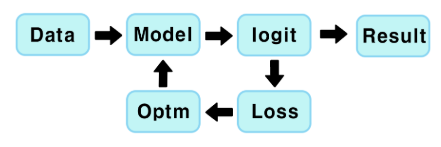

# Prepare MNIST Datset

In [3]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

## Build Model

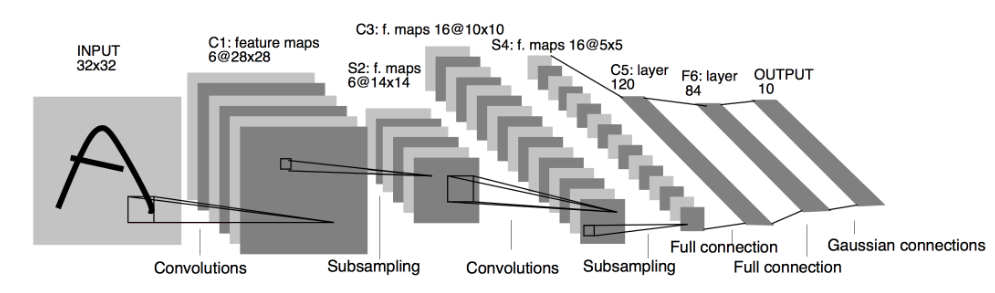


In [4]:
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

# Optimization  
모델을 학습하기 전 설정 

- Loss Function  
- Optimization  
- Metrics

# Loss Function  
Loss Function 방법 확인

### Categorical vs Binary

In [5]:
loss = 'binary_crossentropy' # 개? 고양이?
loss = 'categorical_crossentropy' # one-hot encoding 할때 

### sparse_categorical_crossentropy vs categorical_crossentropy

In [6]:
loss_fun = tf.keras.losses.sparse_categorical_crossentropy

In [7]:
tf.keras.losses.categorical_crossentropy # one-hot encoding 할때 

<function tensorflow.python.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

In [8]:
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

# Metrics  

모델을 평가하는 방법

accuracy를 이름으로 넣는 방법

In [9]:
metrics = ['accuracy'] # 전체에서 맞힌 확률

tf.keras.metrics.

In [18]:
tf.keras.metrics.Accuracy()
tf.keras.metrics.Precision()
tf.keras.metrics.Recall()
# 다 같은 방법임 

In [19]:
metrics = [tf.keras.metrics.Accuracy()]

## Compile  
Optimizer 적용

- 'sgd'
- 'rmsprop'
- 'adam'

In [10]:
optm = tf.keras.optimizers.Adam()

- tf.keras.optimizers.SGD()  
- tf.keras.optimizers.RMSprop()    
- tf.keras.optimizers.Adam()  

In [11]:
model.compile(optimizer=optm, loss=loss, metrics=metrics)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=[tf.keras.metrics.Accuracy()])

# Prepare Dataset  
학습에 사용할 데이터셋 준비

shape 확인

In [13]:
train_x.shape, train_y.shape # gray일 경우, train_x 차원을 늘려줘야함.

((60000, 28, 28), (60000,))

In [14]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

차원 수 늘리기

In [23]:
import numpy as np

In [24]:
np.expand_dims(train_x,-1).shape

(60000, 28, 28, 1)

In [29]:
tf.expand_dims(train_x,-1).shape

TensorShape([60000, 28, 28, 1])

In [26]:
train_x = train_x[...,tf.newaxis]
test_x = test_x[...,tf.newaxis]

차원 수 잘 늘었는지 확인

In [27]:
train_x.shape,test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Rescaling

In [28]:
np.min(train_x), np.max(train_x)

(0, 255)

In [29]:
train_x = train_x/255.
test_x = test_x/255.

In [30]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

# Training  
본격적으로 학습 들어가기

학습용 Hyperparameter 설정

- num_epochs : 책 한권을 몇회독 하는가
- batch_size : 한번 저장시에 얼만큼 저장할건가

In [31]:
num_epochs =1
batch_size = 32


- model.fit

In [32]:
model.fit(train_x,train_y,
         batch_size=batch_size,
         shuffle=True,
         epochs=num_epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
60000/60000 [==============================] - 141s 2ms/sample - loss: 0.1460 - accuracy: 1.5667e-04


# Check History  
학습 과정(History) 결과 확인